## Final Project Submission

Please fill out:
* Student name: Calvin Omwega
* Student pace: Full time
* Scheduled project review date/time: N/A
* Instructor name: Maryann Mwikali
* Blog post URL:N/A


## 1.Introduction

# 1.1 Overview
The project's primary purpose is to generate insights that can assist Microsoft in entering and succeeding in the movie industry. We will utilize exploratory data analysis to get actionable insights to assist Microsoft determine what kind of films to develop. This project will leverage existing movie data to analyze box office trends, genre performance, and financial metrics to recommend strategic directions for Microsoft's new movie studio.

# 1.2 General Objectives
1. Identify Successful Film Genres: Determine which movie genres are performing best at the box office, both domestically and internationally.

2. Analyze Budgets versus Returns: Examine the relationship between film budgets and their financial success to identify optimal investment levels.

3. Understand Market Trends: Capture current trends in movie consumption and preferences, including the impact of digital and streaming platforms.

4. Provide Strategic Recommendations: Translate findings into actionable strategies for genre selection, budget allocation, and technological integration for Microsoft's studio.

# 1.3 Key Questions 
1. Which movie genres yield the highest box office earnings and ROI?
Aims to identify genres that consistently perform well, offering a safer investment for Microsoft.
2. What is the optimal budget range for producing a profitable movie?
Seeks to find a budget sweet spot that maximizes earnings without unnecessarily inflating costs.
3. How do movie budgets correlate with box office success?
Investigates whether higher budgets lead to higher gross earnings or if diminishing returns set in beyond a certain point.

# 2. Data Sets
The data sets are stored in the 'zippedData' folder which were sourced from:

- Box Office MojoLinks
    - bom.movie_gross.csv
- TheMovieDBLinks
    - tmdb.movies.csv
- The Numbers
    - tn.movie_budgets.csv


# 2.2 Iporting the libraries

In [2]:
# Your code here - remember to use markdown cells for comments as well!
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

%matplotlib inline

In [3]:
# Loading the datasets
df_gross = pd.read_csv('bom.movie_gross.csv')
df_tmdb = pd.read_csv('tmdb.movies.csv')
df_budgets = pd.read_csv('tn.movie_budgets.csv')

In [50]:
# Displaying the first few rows of the dataset to understand its structure and its data types.
print(df_gross.head())
df_gross.shape
df_gross.info()

                                         title studio  domestic_gross  \
0                                  toy story 3     BV     415000000.0   
1                   alice in wonderland (2010)     BV     334200000.0   
2  harry potter and the deathly hallows part 1     WB     296000000.0   
3                                    inception     WB     292600000.0   
4                          shrek forever after   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int6

In [51]:
# This is still displaying the data sets and the first few rows of the datasets to understand its structure
print(df_tmdb.head())
df_tmdb.shape
df_tmdb.info()

   Unnamed: 0            genre_ids     id original_language  \
0           0      [12, 14, 10751]  12444                en   
1           1  [14, 12, 16, 10751]  10191                en   
2           2        [12, 28, 878]  10138                en   
3           3      [16, 35, 10751]    862                en   
4           4        [28, 878, 12]  27205                en   

                                 original_title  popularity release_date  \
0  Harry Potter and the Deathly Hallows: Part 1      33.533   2010-11-19   
1                      How to Train Your Dragon      28.734   2010-03-26   
2                                    Iron Man 2      28.515   2010-05-07   
3                                     Toy Story      28.005   1995-11-22   
4                                     Inception      27.920   2010-07-16   

                                          title  vote_average  vote_count  
0  Harry Potter and the Deathly Hallows: Part 1           7.7       10788  
1           

In [52]:
# This is the last display of the last data set being used
print(df_budgets.head())
df_budgets.shape
df_budgets.info()

   id  release_date                                        movie  \
0   1  Dec 18, 2009                                       avatar   
1   2  May 20, 2011  pirates of the caribbean: on stranger tides   
2   3   Jun 7, 2019                                 dark phoenix   
3   4   May 1, 2015                      avengers: age of ultron   
4   5  Dec 15, 2017            star wars ep. viii: the last jedi   

   production_budget domestic_gross  worldwide_gross  
0          425000000   $760,507,625       2776345279  
1          410600000   $241,063,875       1045663875  
2          350000000    $42,762,350        149762350  
3          330600000   $459,005,868       1403013963  
4          317000000   $620,181,382       1316721747  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_d

In [55]:
# Example of cleaning 'df_gross'
# Convert 'foreign_gross' to numeric, errors='coerce' turns non-numeric values into NaN
df_gross['foreign_gross'] = pd.to_numeric(df_gross['foreign_gross'], errors='coerce')

# Drop rows with any missing values
df_gross_clean = df_gross.dropna()
df_gross_clean

,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000.0,2010
1,alice in wonderland (2010),BV,334200000.0,691300000.0,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000.0,2010
3,inception,WB,292600000.0,535700000.0,2010
4,shrek forever after,P/DW,238700000.0,513900000.0,2010
...,...,...,...,...,...
3275,i still see you,LGF,1400.0,1500000.0,2018
3286,the catcher was a spy,IFC,725000.0,229000.0,2018
3309,time freak,Grindstone,10000.0,256000.0,2018
3342,reign of judges: title of liberty - concept short,Darin Southa,93200.0,5200.0,2018


In [47]:

df_gross['title'] = df_gross['title'].astype(str).str.lower().str.strip()
df_budgets['movie'] = df_budgets['movie'].astype(str).str.lower().str.strip()
df_gross

,title,studio,domestic_gross,foreign_gross,year
0,toy story 3,BV,415000000.0,652000000,2010
1,alice in wonderland (2010),BV,334200000.0,691300000,2010
2,harry potter and the deathly hallows part 1,WB,296000000.0,664300000,2010
3,inception,WB,292600000.0,535700000,2010
4,shrek forever after,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,the quake,Magn.,6200.0,NaN,2018
3383,edward ii (2018 re-release),FM,4800.0,NaN,2018
3384,el pacto,Sony,2500.0,NaN,2018
3385,the swan,Synergetic,2400.0,NaN,2018


In [56]:
# Cleaning 'df_budgets': remove '$' and ',' from 'production_budget', 'domestic_gross', 'worldwide_gross', convert to int
df_budgets['production_budget'] = df_budgets['production_budget'].replace('[\$,]', '', regex=True).astype(int)
df_budgets['domestic_gross'] = df_budgets['domestic_gross'].replace('[\$,]', '', regex=True).astype(int)
df_budgets['worldwide_gross'] = df_budgets['worldwide_gross'].replace('[\$,]', '', regex=True).astype(int)
df_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",pirates of the caribbean: on stranger tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",dark phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",avengers: age of ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",star wars ep. viii: the last jedi,317000000,620181382,1316721747
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",red 11,7000,0,0
5778,79,"Apr 2, 1999",following,6000,48482,240495
5779,80,"Jul 13, 2005",return to the land of wonders,5000,1338,1338
5780,81,"Sep 29, 2015",a plague so pleasant,1400,0,0


In [89]:
# Assuming 'release_date' is in string format, convert to datetime for any time-series analysis
df_tmdb['release_date'] = pd.to_datetime(df_tmdb['release_date'])

# Also standardize movie titles
df_tmdb['title'] = df_tmdb['title'].str.lower().strip()


AttributeError: 'Series' object has no attribute 'strip'

In [57]:
# Merging datasets on a hypothetical common key, assuming 'title' for simplicity
df_merged = pd.merge(df_gross, df_budgets, left_on='title', right_on='movie', how='inner')
df_merged

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,toy story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",toy story 3,200000000,415004880,1068879522
1,inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",inception,160000000,292576195,835524642
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",shrek forever after,165000000,238736787,756244673
3,the twilight saga: eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",the twilight saga: eclipse,68000000,300531751,706102828
4,iron man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",iron man 2,170000000,312433331,621156389
...,...,...,...,...,...,...,...,...,...,...,...
1282,gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",gotti,10000000,4286367,6089100
1283,ben is back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",ben is back,13000000,3703182,9633111
1284,bilal: a new breed of hero,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",bilal: a new breed of hero,30000000,490973,648599
1285,mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",mandy,6000000,1214525,1427656


In [58]:
# Verify the merge was successful
if not df_merged.empty:
    print("Merge was successful, with {} rows.".format(len(df_merged)))
else:
    print("Merge failed, resulting in an empty DataFrame.")


Merge was successful, with 1287 rows.


In [64]:
# Calculate ROI (Return on Investment)
df_merged['ROI'] = (df_merged['worldwide_gross'] - df_merged['production_budget']) / df_merged['production_budget']
df_merged['ROI']

0       4.344398
1       4.222029
2       3.583301
3       9.383865
4       2.653861
          ...   
1282   -0.391090
1283   -0.258991
1284   -0.978380
1285   -0.762057
1286   -0.693122
Name: ROI, Length: 1287, dtype: float64

In [63]:
# Basic statistics
df_merged['ROI'].describe()

count    1287.000000
mean        3.307633
std        13.188484
min        -1.000000
25%         0.141244
50%         1.441225
75%         3.284102
max       415.564740
Name: ROI, dtype: float64

In [35]:
total_roi = 0
for index, row in df_merged.iterrows():
    total_roi += row['ROI']
average_roi = total_roi / len(df_merged)
print(f"Average ROI: {average_roi}")

Average ROI: 3.3076326171896193


In [71]:
# Finding the average ROI using base Python, showcasing iteration over rows
high_roi_movies = df_merged[df_merged['ROI'] > 3.0]
print(high_roi_movies[['title', 'ROI']])

                           title        ROI
0                    toy story 3   4.344398
1                      inception   4.222029
2            shrek forever after   3.583301
3     the twilight saga: eclipse   9.383865
6                  despicable me   6.876298
...                          ...        ...
1265                  winchester  11.679440
1266     paul, apostle of christ   4.105900
1271        unfriended: dark web  15.434588
1272                     upgrade   4.517762
1273                      unsane   8.496621

[365 rows x 2 columns]


In [76]:
# Expandeding genre ID to name mapping
# 
genre_id_to_name = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    80: "Crime",
    99: "Documentary",
    18: "Drama",
    10751: "Family",
    14: "Fantasy",
    36: "History",
    27: "Horror",
    10402: "Music",
    9648: "Mystery",
    10749: "Romance",
    878: "Science Fiction",
    10770: "TV Movie",
    53: "Thriller",
    10752: "War",
    37: "Western"
}
# IMDB


In [78]:
# Function to extract primary genre name from genre_ids list
def extract_primary_genre(genre_ids_list, genre_mapping):
    genre_ids = eval(genre_ids_list)  # Convert string representation of list to actual list
    if not genre_ids:  # Check if genre_ids list is empty
        return "Unknown"  # Return 'Unknown' if no genre ID is available
    primary_genre_id = genre_ids[0]  # Assuming the first genre is the primary
    return genre_mapping.get(primary_genre_id, "Unknown")  # Map genre ID to name, return 'Unknown' if ID not found

# Apply the function to each row in df_tmdb to create a new 'primary_genre' column
df_tmdb['primary_genre'] = df_tmdb['genre_ids'].apply(lambda x: extract_primary_genre(x, genre_id_to_name))
df_tmdb['primary_genre']

0        Adventure
1          Fantasy
2        Adventure
3        Animation
4           Action
           ...    
26512       Horror
26513        Drama
26514      Fantasy
26515       Family
26516     Thriller
Name: primary_genre, Length: 26517, dtype: object

In [85]:
# Assuming 'df_merged' is your dataset that has been merged previously with other details like budget and revenue
# And assuming it contains a column 'id' that can be matched with 'df_tmdb' 'id' for merging genre information

# Merging 'df_tmdb' with 'df_merged' to add primary_genre information
df_final = pd.merge(df_merged, df_tmdb[['id', 'primary_genre']], on='id', how='left')
df_final
# Now df_final contains financials, and primary_genre which can be used for in-depth genre performance analysis

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI,primary_genre
0,toy story 3,BV,415000000.0,652000000.0,2010,47,"Jun 18, 2010",toy story 3,200000000,415004880,1068879522,4.344398,NaN
1,inception,WB,292600000.0,535700000.0,2010,38,"Jul 16, 2010",inception,160000000,292576195,835524642,4.222029,NaN
2,shrek forever after,P/DW,238700000.0,513900000.0,2010,27,"May 21, 2010",shrek forever after,165000000,238736787,756244673,3.583301,Drama
3,the twilight saga: eclipse,Sum.,300500000.0,398000000.0,2010,53,"Jun 30, 2010",the twilight saga: eclipse,68000000,300531751,706102828,9.383865,NaN
4,iron man 2,Par.,312400000.0,311500000.0,2010,15,"May 7, 2010",iron man 2,170000000,312433331,621156389,2.653861,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1282,gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",gotti,10000000,4286367,6089100,-0.391090,NaN
1283,ben is back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",ben is back,13000000,3703182,9633111,-0.258991,Action
1284,bilal: a new breed of hero,VE,491000.0,1700000.0,2018,100,"Feb 2, 2018",bilal: a new breed of hero,30000000,490973,648599,-0.978380,NaN
1285,mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",mandy,6000000,1214525,1427656,-0.762057,NaN


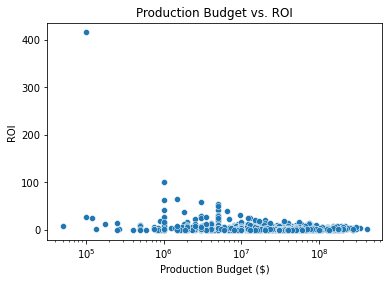

In [86]:
# Visualizing the relationship between production budgets and ROI across movies.
# This scatter plot helps identify if higher budgets correlate with better returns.
sns.scatterplot(data=df_merged, x='production_budget', y='ROI')
plt.title('Production Budget vs. ROI')
plt.xlabel('Production Budget ($)')
plt.ylabel('ROI')
plt.xscale('log')  # Applying a logarithmic scale to better visualize a wide range of budgets
plt.show()


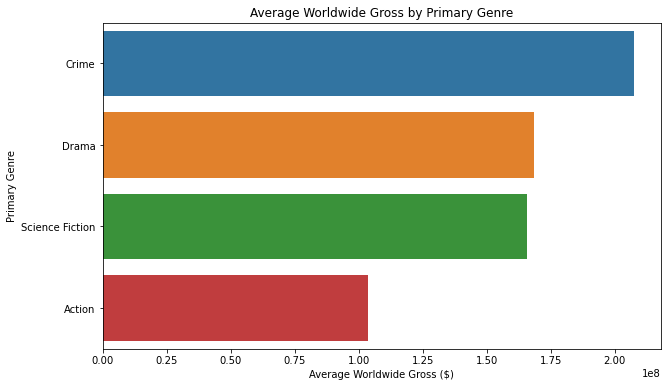

In [87]:
# Calculate average worldwide gross by primary genre
avg_gross_by_genre = df_final.groupby('primary_genre')['worldwide_gross'].mean().sort_values(ascending=False)

# Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_gross_by_genre.values, y=avg_gross_by_genre.index)
plt.title('Average Worldwide Gross by Primary Genre')
plt.xlabel('Average Worldwide Gross ($)')
plt.ylabel('Primary Genre')
plt.show()
